## 单变量房价预测

In [2]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")

D:\ProgramData\Anaconda3\envs\tensorflow112\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


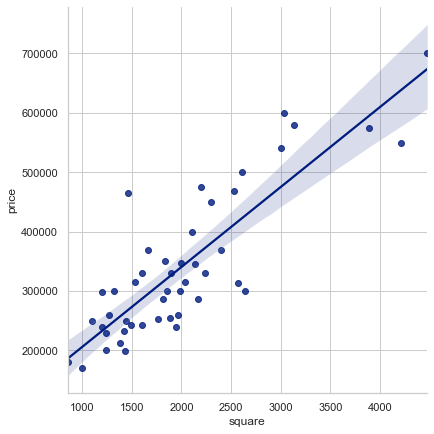

In [3]:
df0 = pd.read_csv('data0.csv', names=['square', 'price'])
sns.lmplot('square', 'price', df0, height=6, fit_reg=True)

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   square  47 non-null     int64
 1   price   47 non-null     int64
dtypes: int64(2)
memory usage: 880.0 bytes


## 多变量房价预测

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

df1 = pd.read_csv('data1.csv', names=['square', 'bedrooms', 'price'])
df1.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


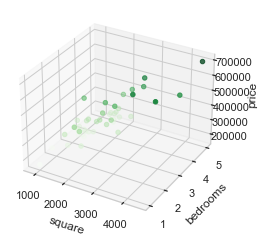

In [6]:
fig = plt.figure()
# 创建一个 Axes3D object
ax = plt.axes(projection='3d')
# 设置 3 个坐标轴的名称
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
# 绘制 3D 散点图
ax.scatter3D(df1['square'], df1['bedrooms'], df1['price'], c=df1['price'], cmap='Greens')

## 数据规范化

In [7]:
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

df = normalize_feature(df1)
df.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


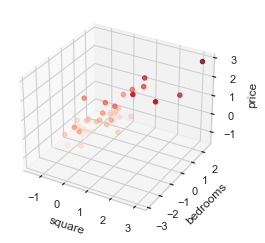

In [8]:
ax = plt.axes(projection='3d')
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.scatter3D(df['square'], df['bedrooms'], df['price'], c=df['price'], cmap='Reds')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   square    47 non-null     float64
 1   bedrooms  47 non-null     float64
 2   price     47 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


## 数据处理：添加 ones 列（x0）

In [10]:
import numpy as np
ones = pd.DataFrame({'ones': np.ones(len(df))})# ones是n行1列的数据框，表示x0恒为1

In [11]:
df = pd.concat([ones, df], axis=1)
df.head()

,ones,square,bedrooms,price
0,1.0,0.130010,-0.223675,0.475747
1,1.0,-0.504190,-0.223675,-0.084074
2,1.0,0.502476,-0.223675,0.228626
3,1.0,-0.735723,-1.537767,-0.867025
4,1.0,1.257476,1.090417,1.595389


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ones      47 non-null     float64
 1   square    47 non-null     float64
 2   bedrooms  47 non-null     float64
 3   price     47 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB
